# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: ERARSLAN

Student name: Aras Umut
    
ID: 2005627

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2005627
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [71 64 59 72 66 54 53 48 54 59]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


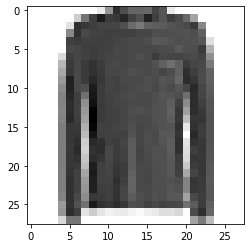

LABEL: 2
INPUT:


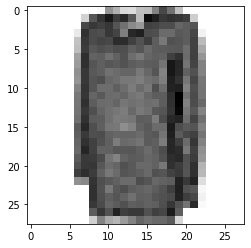

LABEL: 2
INPUT:


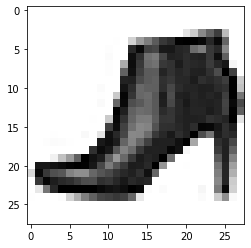

LABEL: 9
INPUT:


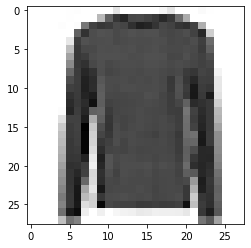

LABEL: 2


In [7]:
import random

#let's try the plotting function
plot_input(X_train,y_train,random.randrange(10)) #show random images
plot_input(X_test,y_test,random.randrange(700))
plot_input(X_test,y_test,random.randrange(700))
plot_input(X_test,y_test,random.randrange(700))

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [9]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
import pandas as pd

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM

grid = GridSearchCV(SVC(kernel = 'linear'), parameters, refit = True, verbose = 0, cv=4) # cv 4 means 4 fold, verbose is to print training
grid.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:") #max of mean test score in cv_results_
print(grid.best_score_)

print("All scores on the grid:") #cv_results_ detailed scores/results table
print(pd.DataFrame(grid.cv_results_))

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.7999999999999999
All scores on the grid:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.213434      0.009952         0.049617        0.002579   0.001   
1       0.105468      0.004194         0.036402        0.000499    0.01   
2       0.081037      0.002268         0.031167        0.001087     0.1   
3       0.085023      0.002271         0.030917        0.001222       1   
4       0.085272      0.001496         0.031665        0.001475      10   
5       0.085023      0.002579         0.031416        0.001115     100   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.633333           0.620000           0.613333   
1   {'C': 0.01}           0.780000           0.760000           0.820000   
2    {'C': 0.1}           0.786667           0.786667           0.820000   
3      {'C': 1}           0.766667 

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [ ]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

grid = GridSearchCV(SVC(kernel = 'poly', degree = 2), parameters, refit = True, verbose = 0, cv=4) # cv 4 means 4 fold, verbose is to print training
grid.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:") #max of mean test score in cv_results_
print(grid.best_score_)

print("\nAll scores on the grid:") #cv_results_ detailed scores/results table
print(pd.DataFrame(grid.cv_results_))

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [ ]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4
grid = GridSearchCV(SVC(kernel = 'poly', degree = 4), parameters, refit = True, verbose = 0, cv=4) # cv 4 means 4 fold, verbose is to print training
grid.fit(X_train,y_train)


print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:") #max of mean test score in cv_results_
print(grid.best_score_)

print("\nAll scores on the grid:") #cv_results_ detailed scores/results table
print(pd.DataFrame(grid.cv_results_))

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [ ]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
grid = GridSearchCV(SVC(kernel = 'rbf'), parameters, refit = True, verbose = 0, cv=4) # cv 4 means 4 fold, , verbose is to print training
grid.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:") #max of mean test score in cv_results_
print(grid.best_score_)

print("\nAll scores on the grid:") #cv_results_ detailed scores/results table
print(pd.DataFrame(grid.cv_results_))

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

Firstly polynomial gave the worst results. 2-degree polynomial gave a better score than 4-degree polynomial.
Even though linear and RBF are so close to each other, RBF gave a better score. So in this dataset, we can clearly say that the polynomial kernel is eliminated by linear and RBF.


## TO DO 5
Report here the best SVM kernel and parameters

In [ ]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C = 5.0, gamma = 0.005, kernel = 'rbf') #best is to do 4 (rbf)
best_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [ ]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1 - train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1 - test_error))
    
    plt.show()

In [ ]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    my_svm = SVC(C = C, kernel ='rbf', gamma = gamma)
    my_svm.fit(X_train_pca, y_train_plot)
    
    train_error = 1 - my_svm.score(X_train_pca, y_train_plot)
    test_error = 1 - my_svm.score(X_test_pca, y_test_plot)
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot, train_error, test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

C list contains 4 different C values that are going from smaller to higher. On the shapes, the smallest C has the simplest boundaries while the highest C has the most complicated one. That is totally expected because C controls the cost of misclassification on the training data. So, while C is getting higher, it starts to overfit.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [ ]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


In [ ]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
for gamma in gamma_values:
    my_svm = SVC(C = 1, kernel ='rbf', gamma = gamma)
    my_svm.fit(X_train, y_train)
    
    train_acc_list.append(my_svm.score(X_train, y_train))
    test_acc_list.append(my_svm.score(X_test, y_test))
    

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

Same as the C example, here gamma list is going from lower to higher. On the train plot, we can see that at 0.1 gamma, accuracy reaches 100% while on the test plot, accuracy starts decreasing after 0.01. So that means after gamma 0.01, overfit is starting. As we can see, the best gamma we can choose here is 0.01. 

Best gamma(best test accuracy) = 0.01
Overfit starts when a gamma, that is higher than the best gamma, is used.


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [ ]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [ ]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C = 5.0, gamma = 0.005, kernel = 'rbf')
best_SVM.fit(X_train, y_train)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [ ]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C = 1e5)
logreg.fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

## TO DO 10 Try  with regularization (use C=1)¶

In [ ]:
logreg = linear_model.LogisticRegression(C = 1.0)
logreg.fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.

Best SVM with m=600 gives 0.045 training and 0.219 test error while best SVM with m=1500 gives 0.054 training error and 0.170291 test error. So there is an almost 5% accuracy difference between the 2 options. That means there is a huge difference between accuracies while training with 600 and 1500 data points. An increase in training error has no harm to us, so using higher training data points is the key here to increase our test accuracy. There would be an even lower test error If we would use more than 1500 data points. When I tested it with 5000 data points, I got a 0.14 test error as I expected.

- the results of SVM and of Logistic Regression

When I tested both with m=1500, the results are; for the best SVM gives 0.054 training error, 0.170291 test error and for the logistic regression (C=1) 0.010667 training error, 0.185282 test error. As we can see, from test errors, our best SVM gives better test accuracy. Also, another important point is, logistic regression gives 0.01 training error while test error is 0.185. The difference between training and test error for logistic regression is a lot bigger than the difference between training and test error of our best SVM. We know that we need to choose a different option between SVM kernels/logistic regression depending on the number of features and number of training examples. In this example(with this dataset and data points), It can be seen that our SVM is a better choice.


## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [ ]:
X_small = X[:3000] # small test list
y_small = y[:3000]
permutation = np.random.permutation(X_small.shape[0]) # i wanted to see different results
X_small = X_small[permutation]
y_small = y_small[permutation]

LR_prediction = logreg.predict(X_small)
SVM_prediction = best_SVM.predict(X_small)

for i in range(len(y_small)):
    if(LR_prediction[i] != y_small[i]):
        if(SVM_prediction[i] == y_small[i]):
            print("LR Prediction = " + str(LR_prediction[i]) + "   SVM Prediction = " + str(SVM_prediction[i]) + "   Label = " + str(y_small[i]))
            plot_input(X_small,y_small,i)
            break; #stop after 1 item

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [ ]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, best_SVM.predict(X_test), labels)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)

confusion_LR =  confusion_matrix(y_test, logreg.predict(X_test), labels)
print("\n Confusion matrix LR  \n \n", confusion_LR)

In [ ]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

As we can see the labels with the highest true positive(TP)/accuracy (>=90) are 1-Trouser, 5-Sandal, 8-Bag, 9-Ankle Boot. After I compared these labels and check their images on the dataset, I saw that images that belong to these 4 classes have very unique characteristics. For example, a bag, or a trouser has very unique shapes among other images that have different labels. So, they can be predicted and learned easier than others. 

When we check lower accuracy ones, we see that label 6-Shirt has 54% TP/accuracy (SVM). When we check the confusion matrix, we see that 8% of shirts are labeled as 0-T-shirt and 11% of them are labeled as 2-Pullover. When I checked the images, even I sometimes confused while labeling the image as Shirt because Shirts do not have huge unique characteristics that separate them from all other labels. Another example is, label 2-Pullover is labeled with 66% accuracy(LR) and the 12% of them are labeled as 6-Shirt. 

To sum up, labels that have similar characteristics have lower accuracy while labels that have unique characteristics like the bag has high accuracy.